<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/agrismartsystem/blob/main/DeepLearning/TreinoUmavariavelLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing bibliotecas
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"saulohenriaguiar","key":"f39a97212cfdbde2b816fdffcb292e24"}'}

In [5]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download -d mohitsingh1804/crop-recommendation

crop-recommendation.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
! unzip crop-recommendation.zip

Archive:  crop-recommendation.zip
replace Crop_recommendation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Crop_recommendation.csv  


In [10]:
df = pd.read_csv("Crop_recommendation.csv", delimiter=",")

In [11]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [12]:
df['time'] = pd.date_range('11/5/2015', periods = 2200, freq ='1D')

In [13]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,time
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,2015-11-05
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,2015-11-06
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,2015-11-07
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,2015-11-08
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,2015-11-09
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,2021-11-08
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,2021-11-09
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,2021-11-10
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,2021-11-11


In [14]:
## features 

features_3 = ['temperature', 'humidity', 'ph','time']

features = df[features_3]
features.index = df['time']
features.head()

,temperature,humidity,ph,time
time,,,,
2015-11-05,20.879744,82.002744,6.502985,2015-11-05
2015-11-06,21.770462,80.319644,7.038096,2015-11-06
2015-11-07,23.004459,82.320763,7.840207,2015-11-07
2015-11-08,26.491096,80.158363,6.980401,2015-11-08
2015-11-09,20.130175,81.604873,7.628473,2015-11-09


In [15]:
dataset = features
dataset

,temperature,humidity,ph,time
time,,,,
2015-11-05,20.879744,82.002744,6.502985,2015-11-05
2015-11-06,21.770462,80.319644,7.038096,2015-11-06
2015-11-07,23.004459,82.320763,7.840207,2015-11-07
2015-11-08,26.491096,80.158363,6.980401,2015-11-08
2015-11-09,20.130175,81.604873,7.628473,2015-11-09
...,...,...,...,...
2021-11-08,26.774637,66.413269,6.780064,2021-11-08
2021-11-09,27.417112,56.636362,6.086922,2021-11-09
2021-11-10,24.131797,67.225123,6.362608,2021-11-10


In [16]:
uni_data = df['ph']
uni_data.index = df['time']
uni_data.head()

time
2015-11-05    6.502985
2015-11-06    7.038096
2015-11-07    7.840207
2015-11-08    6.980401
2015-11-09    7.628473
Name: ph, dtype: float64

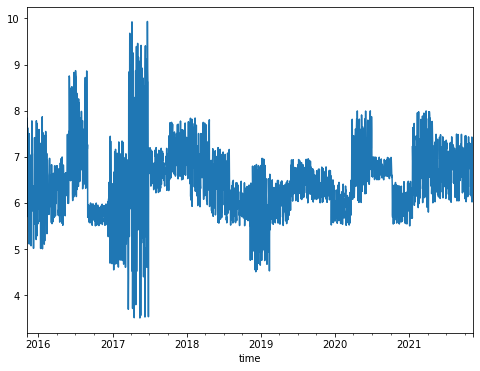

In [17]:
uni_data.plot()

In [18]:
uni_data = uni_data.values

In [19]:
## divisão de teste  para média de janela móvel de série temporal simples
train_split = 1200
tf.random.set_seed(13)

In [20]:
### padronizar dados
uni_data_mean = uni_data[:train_split].mean()
uni_data_std = uni_data[:train_split].std()
uni_data  = (uni_data - uni_data_mean)/ uni_data_std

print(type(uni_data))

<class 'numpy.ndarray'>


In [21]:
## funções de utilidade

## função para criar dados para previsão univariada

def univariate_data(dataset, start_idx , end_idx , history_size, target_size):
  data = []
  labels = []
  start_idx  = start_idx + history_size
  if end_idx is None:
    end_idx = len(dataset)- target_size
  for i in range(start_idx , end_idx):
    idxs = range(i-history_size , i)
    data.append(np.reshape(dataset[idxs] , (history_size, 1))) ### remodelar dados
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

uni_data_history = 20   ## últimos 20 valores
uni_data_future = 0     ## dados futuros

x_train_uni , y_train_uni = univariate_data(uni_data , 0 , train_split , uni_data_history , uni_data_future)

x_val_uni , y_val_uni = univariate_data(uni_data , train_split , None ,uni_data_history , uni_data_future)

In [22]:
print(x_train_uni.shape , y_train_uni.shape)
print(x_val_uni.shape , y_val_uni.shape)

(1180, 20, 1) (1180,)
(980, 20, 1) (980,)


In [23]:
print('Janela única de dados do histórico' , x_train_uni[0])

print('pH alvo a prever ' , y_train_uni[0])

Janela única de dados do histórico [[ 0.06221403]
 [ 0.64273588]
 [ 1.51291567]
 [ 0.58014425]
 [ 1.28321315]
 [ 0.68109351]
 [-0.80804043]
 [-0.78870656]
 [ 0.26005075]
 [-0.11866699]
 [-1.14937924]
 [ 1.14691221]
 [-1.45041335]
 [ 0.58443245]
 [ 0.54501524]
 [ 0.64729524]
 [-0.2132701 ]
 [ 0.56979342]
 [-0.53343183]
 [-0.64191937]]
pH alvo a prever  -0.003430902424477389


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

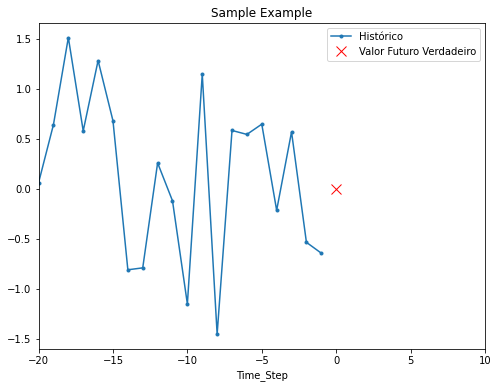

In [24]:
### função para criar passos de tempo
def create_time_steps(length):
  return list(range(-length,0))

### função para plotar dados de séries temporais

def plot_time_series(plot_data, delta , title):
  labels = ["Histórico" , 'Valor Futuro Verdadeiro' , 'Valor Predito Pelo Modelo']
  marker = ['.-' , 'rx' , 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])

  if delta:
    future = delta
  else:
    future = 0
  plt.title(title)
  for i , x in enumerate(plot_data):
    if i :
      plt.plot(future , plot_data[i] , marker[i], markersize = 10 , label = labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label = labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5) *2])

  plt.xlabel('Time_Step')
  return plt

plot_time_series([x_train_uni[0] , y_train_uni[0]] , 0 , 'Sample Example')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

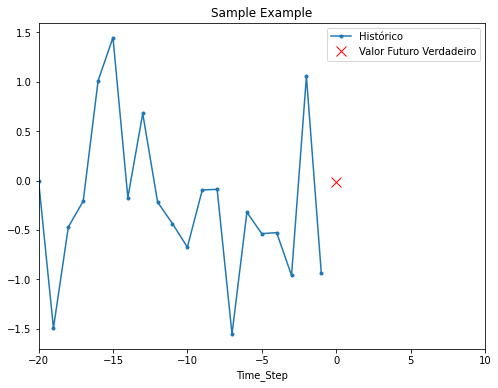

In [25]:
i = 20
plot_time_series([x_train_uni[i], y_train_uni[i]] , 0 , 'Sample Example')

In [26]:
### Média da janela móvel(MWA)

def MWA(history):
  return np.mean(history)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

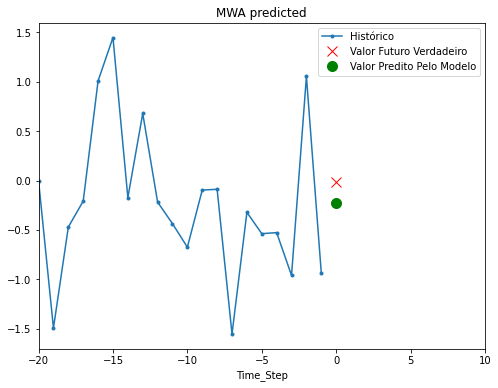

In [27]:
i = 20
plot_time_series([x_train_uni[i] , y_train_uni[i] , MWA(x_train_uni[i])] , 0 , 'MWA predicted')

In [28]:
## preparar o conjunto de dados do tensorflow
batch_size = 256
buffer_size = 200

train_uni = tf.data.Dataset.from_tensor_slices((x_train_uni , y_train_uni))
train_uni = train_uni.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_uni = tf.data.Dataset.from_tensor_slices((x_val_uni , y_val_uni))
val_uni = val_uni.cache().shuffle(buffer_size).batch(batch_size).repeat()

print(train_uni)
print(val_uni)

<RepeatDataset element_spec=(TensorSpec(shape=(None, 20, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<RepeatDataset element_spec=(TensorSpec(shape=(None, 20, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [29]:
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers


layer = layers.Dense(
    units=16,
    kernel_regularizer=regularizers.L1L2(l1=1e-1, l2=1e-1),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)
)

In [30]:
## Definir o modelo LSTM  

lstm_model = tf.keras.models.Sequential([tf.keras.layers.LSTM(32 , input_shape = x_train_uni.shape[-2:]),
                                         tf.keras.layers.Dense(8, activation='relu'),
                                         layer,
                                         tf.keras.layers.Dense(4),
                                         tf.keras.layers.Dense(1)])

lstm_model.compile(optimizer = 'adam', loss = 'mae')

steps = 200

EPOCHS =20

history= lstm_model.fit(train_uni , epochs = EPOCHS, steps_per_epoch = steps ,
               validation_data = val_uni, validation_steps = 50)

Epoch 1/20
200/200 [==============================] - 5s 8ms/step - loss: 3.4658 - val_loss: 1.9924
Epoch 2/20
200/200 [==============================] - 1s 6ms/step - loss: 1.4979 - val_loss: 0.7255
Epoch 3/20
200/200 [==============================] - 1s 6ms/step - loss: 0.7210 - val_loss: 0.4021
Epoch 4/20
200/200 [==============================] - 1s 6ms/step - loss: 0.6068 - val_loss: 0.3956
Epoch 5/20
200/200 [==============================] - 1s 6ms/step - loss: 0.5965 - val_loss: 0.3911
Epoch 6/20
200/200 [==============================] - 1s 6ms/step - loss: 0.5894 - val_loss: 0.3909
Epoch 7/20
200/200 [==============================] - 1s 6ms/step - loss: 0.5837 - val_loss: 0.3930
Epoch 8/20
200/200 [==============================] - 1s 6ms/step - loss: 0.5788 - val_loss: 0.3939
Epoch 9/20
200/200 [==============================] - 1s 6ms/step - loss: 0.5765 - val_loss: 0.3978
Epoch 10/20
200/200 [==============================] - 1s 6ms/step - loss: 0.5704 - val_loss: 0.4052

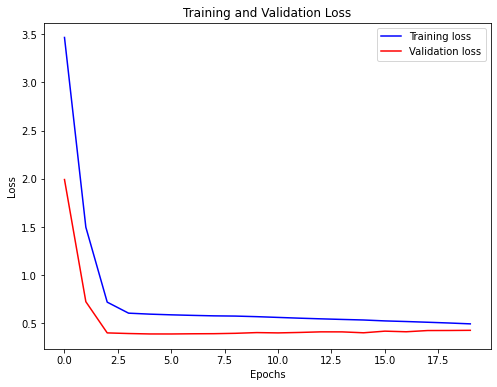

Final val loss:  [1.9923609495162964, 0.7255403399467468, 0.4020841717720032, 0.39559054374694824, 0.3911387026309967, 0.39091476798057556, 0.39296966791152954, 0.39391258358955383, 0.39782848954200745, 0.40522336959838867, 0.40209460258483887, 0.4066998064517975, 0.41292649507522583, 0.4125978648662567, 0.4032169282436371, 0.4201368987560272, 0.4138377904891968, 0.426491916179657, 0.42708900570869446, 0.4287649691104889]


In [34]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    print("Final val loss: ", val_loss)

visualize_loss(history, "Training and Validation Loss")

In [35]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 4,833
Trainable params: 4,833
Non-trainable params: 0
_________________________________________________________________


8/8 [==============================] - 0s 3ms/step


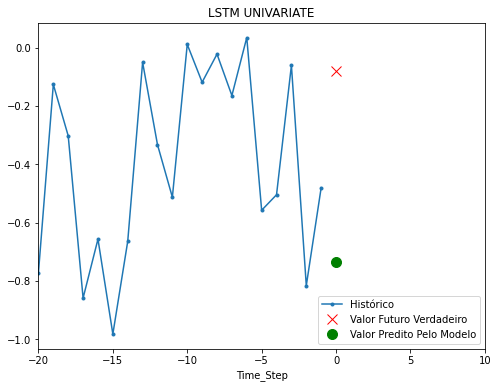

8/8 [==============================] - 0s 3ms/step


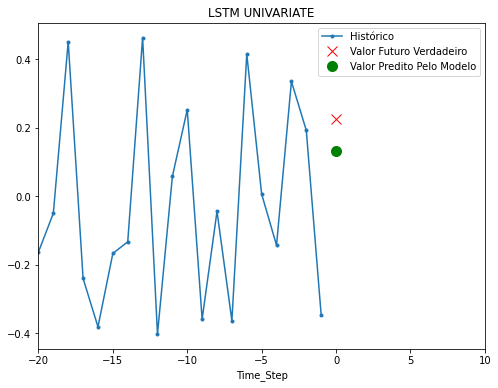

8/8 [==============================] - 0s 3ms/step


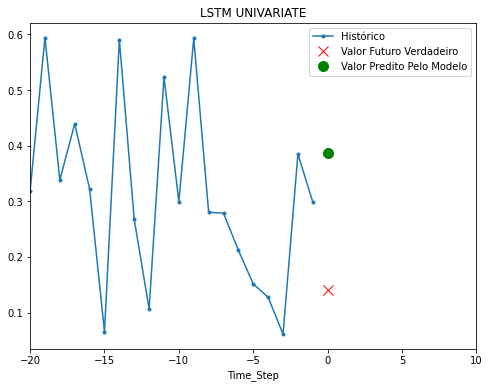

7/7 [==============================] - 0s 3ms/step


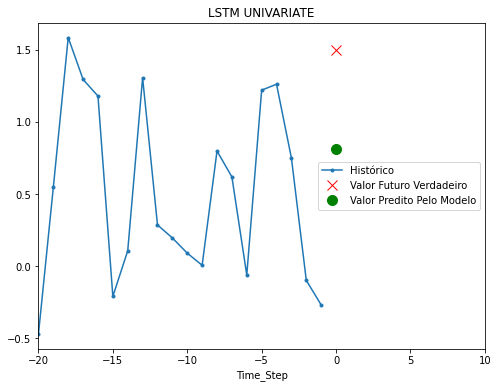

8/8 [==============================] - 0s 4ms/step


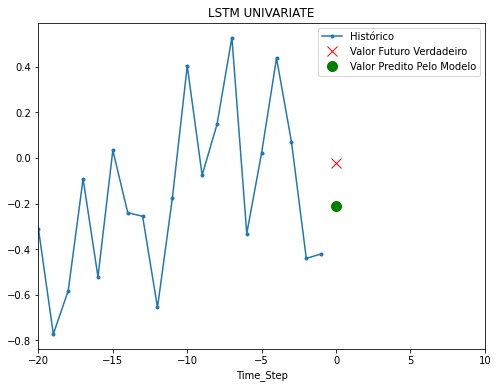

In [36]:
#algumas previsões de valores de serie temporal
for i , j in val_uni.take(5):
  plot = plot_time_series([i[0].numpy() , j[0].numpy() , lstm_model.predict(i)[0]] ,0 , 'LSTM UNIVARIATE')
  plot.show()